In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_routines = pd.read_csv('../data/FICVN-routines.csv')
df_comedians = pd.read_csv('../data/FICVN-comedians.csv')

df_routines['DATE'] = pd.to_datetime(df_routines['DATE'])
df_comedians['BIRTHDATE'] = pd.to_datetime(df_comedians['BIRTHDATE'], format='mixed')

In [4]:
df_routines

,ID,FESTIVAL,YEAR,TV,DATE,SHOWID,VIDEO
0,1,I,1960,NaN,1960-02-21,1,NaN
1,2,I,1960,NaN,1960-02-21,2,NaN
2,3,I,1960,NaN,1960-02-21,3,NaN
3,4,I,1960,NaN,1960-02-21,4,NaN
4,5,II,1961,NaN,1961-02-11,2,NaN
...,...,...,...,...,...,...,...
197,198,LXIII,2024,"Canal 13, TVN",2024-02-26,99,https://www.youtube.com/watch?v=Z4nhHJuBCi4
198,199,LXIII,2024,"Canal 13, TVN",2024-02-27,107,https://www.youtube.com/watch?v=4dZs8JX1XYY
199,200,LXIII,2024,"Canal 13, TVN",2024-02-28,108,https://www.youtube.com/watch?v=Qs2noQccx6A
200,201,LXIII,2024,"Canal 13, TVN",2024-02-29,94,https://www.youtube.com/watch?v=fdyijhv7_rg


In [5]:
df_comedians

,ID,SHOWID,NAME,NATIONALITY,BIRTHDATE,GENDER
0,1,93,Alejandra Azcárate,Colombia,1978-03-03,female
1,2,109,Alex Ortiz,Chile,1986-09-26,male
2,3,92,Alison Mandel,Chile,1983-07-05,female
3,4,51,Álvaro Salas,Chile,1952-12-27,male
4,5,23,Armando Navarrete,Chile,1934-02-28,male
...,...,...,...,...,...,...
124,125,94,Sergio Freire,Chile,1980-10-03,male
125,126,64,Stefan Kramer,Chile,1982-02-19,male
126,127,10,Héctor Cifuentes,Chile,1925-10-14,male
127,128,59,Vanessa Miller,Chile,1965-11-02,female


In [7]:
df = pd.merge(df_routines, df_comedians[['SHOWID', 'NAME', 'BIRTHDATE', 'GENDER']], left_on='SHOWID', right_on='SHOWID')

In [8]:
df

,ID,FESTIVAL,YEAR,TV,DATE,SHOWID,VIDEO,NAME,BIRTHDATE,GENDER
0,1,I,1960,NaN,1960-02-21,1,NaN,Carlos Helo,1929-06-29,male
1,2,I,1960,NaN,1960-02-21,2,NaN,Jorge Romero,1929-11-02,male
2,3,I,1960,NaN,1960-02-21,3,NaN,Luis Sandrini,1905-02-22,male
3,4,I,1960,NaN,1960-02-21,4,NaN,Manuel Carrasco,1918-11-03,male
4,5,II,1961,NaN,1961-02-11,2,NaN,Jorge Romero,1929-11-02,male
...,...,...,...,...,...,...,...,...,...,...
227,198,LXIII,2024,"Canal 13, TVN",2024-02-26,99,https://www.youtube.com/watch?v=Z4nhHJuBCi4,Javiera Contador,1974-06-17,female
228,199,LXIII,2024,"Canal 13, TVN",2024-02-27,107,https://www.youtube.com/watch?v=4dZs8JX1XYY,Luis Slimming,1987-07-11,male
229,200,LXIII,2024,"Canal 13, TVN",2024-02-28,108,https://www.youtube.com/watch?v=Qs2noQccx6A,Lucho Miranda,1995-01-30,male
230,201,LXIII,2024,"Canal 13, TVN",2024-02-29,94,https://www.youtube.com/watch?v=fdyijhv7_rg,Sergio Freire,1980-10-03,male


In [9]:
df['age'] = round((df['DATE'] - df['BIRTHDATE']).dt.days/365, 0)
df['decade'] = df['DATE'].dt.year // 10 * 10
df['quinquennial'] = df['DATE'].dt.year // 5 * 5

<Axes: xlabel='decade', ylabel='age'>

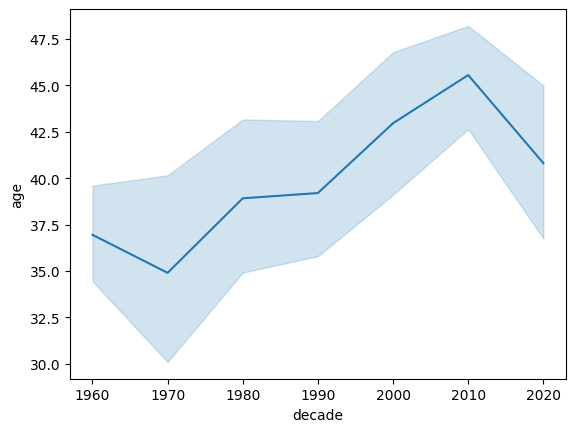

In [28]:
sns.lineplot(data=df, x="decade", y="age")

In [29]:
plt.savefig('../images/age_line_plot.png', dpi=300)

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='quinquennial', ylabel='age'>

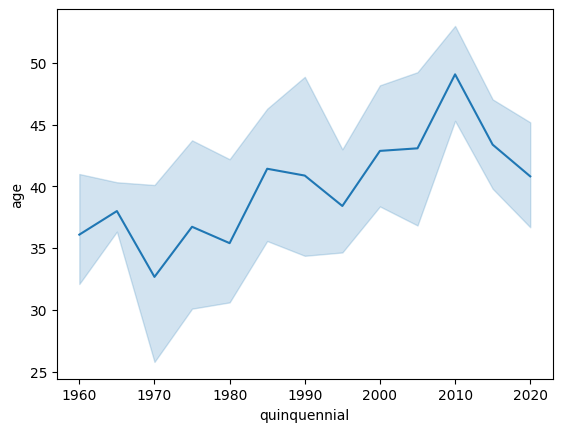

In [11]:
sns.lineplot(data=df, x="quinquennial", y="age")

In [12]:
df_gender = (df[['YEAR', 'GENDER', 'NAME']]
                .groupby(['YEAR', 'GENDER'])
                .agg({'NAME': pd.Series.nunique})
                .rename(columns={'NAME': 'count'})
                .reset_index())

In [13]:
df_gender['cumsum'] = df_gender.groupby('GENDER')['count'].cumsum()

<Axes: xlabel='YEAR', ylabel='cumsum'>

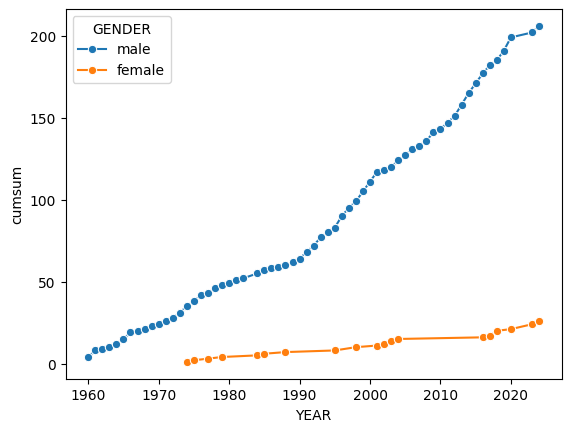

In [15]:
sns.lineplot(data=df_gender, x='YEAR', y='cumsum', hue='GENDER', marker='o')